<h1> Medical Insurance Cost Prediction </h1>

Dataset -- https://www.kaggle.com/datasets/mirichoi0218/insurance



## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import xgboost as xg
from sklearn.metrics import r2_score, mean_absolute_error

## Data Collection 

In [2]:
# loading the data
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Data Analysis and Visulization

#### Analyzing the age column

<Figure size 800x500 with 0 Axes>

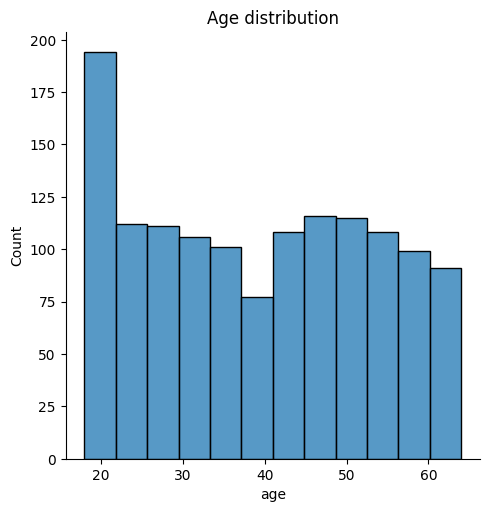

In [8]:
plt.figure(figsize=(8,5))
sns.displot(df['age']);
plt.title('Age distribution')
plt.show();

#### Analyzing the Sex column

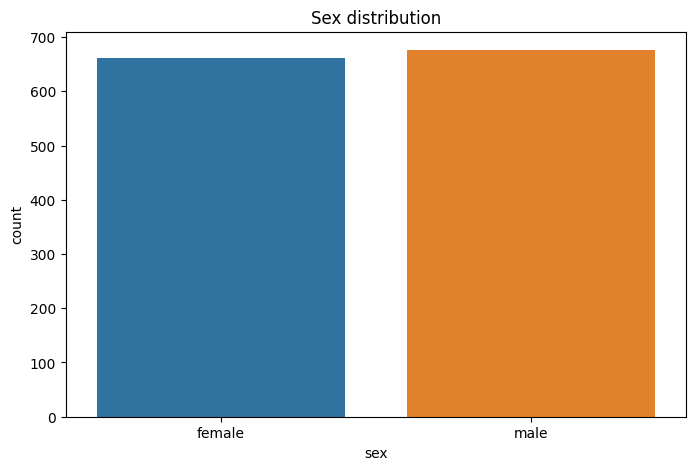

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='sex', data=df,)
plt.title('Sex distribution')
plt.show();

In [10]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

#### Analyzing the Bmi column

<Figure size 800x500 with 0 Axes>

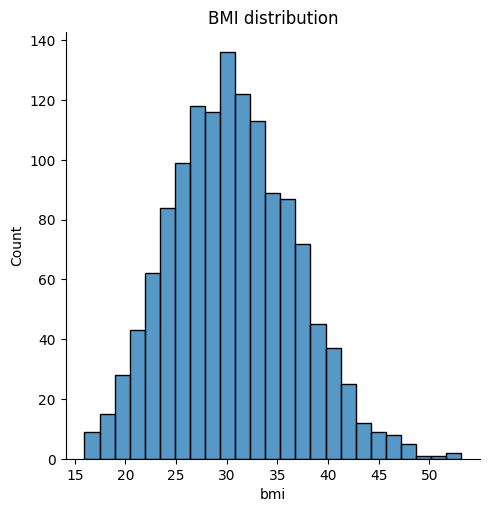

In [11]:
plt.figure(figsize=(8,5))
sns.displot(df['bmi']);
plt.title('BMI distribution')
plt.show();

Below 18.5	Underweight

18.5 – 24.9	Normal

25.0 – 29.9	Overweight

30.0 and above	Obese

#### analyzing the Children column

In [12]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

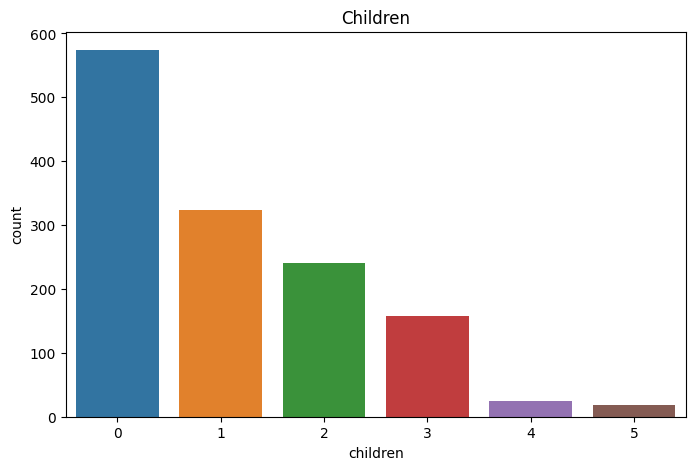

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=df.children)
plt.title('Children')
plt.show()

#### analyzing the smoker column

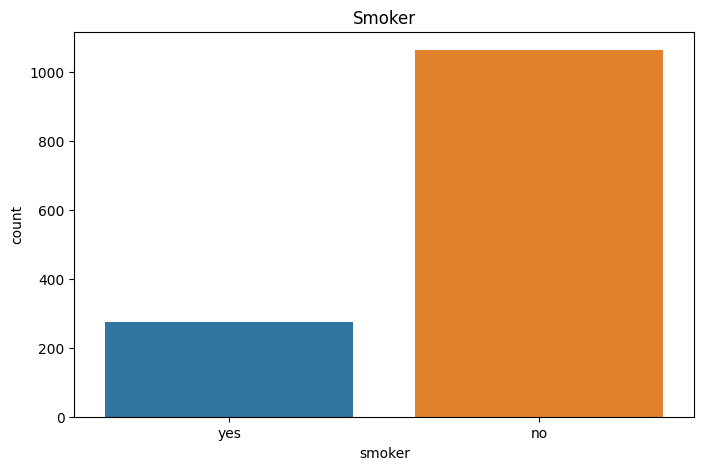

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=df.smoker)
plt.title('Smoker')
plt.show()

In [15]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

#### analyzing the region column

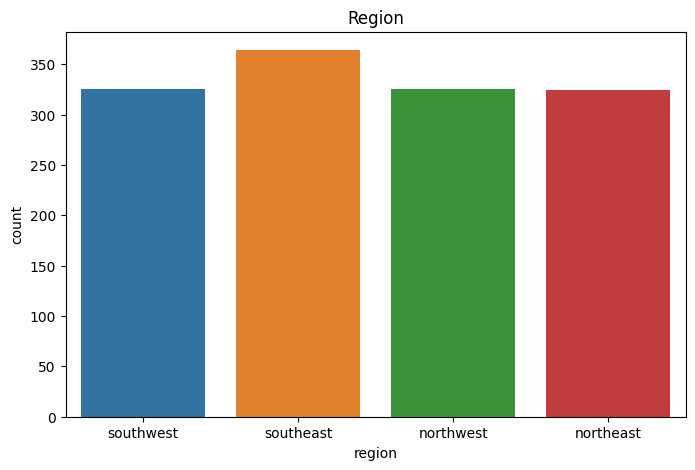

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=df.region)
plt.title('Region')
plt.show()

In [17]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## Spliting the data into dependent and target variable

In [18]:
X = df.drop('charges', axis=1)
y = df.charges

In [19]:
print(X)

      age     sex     bmi  children smoker     region
0      19  female  27.900         0    yes  southwest
1      18    male  33.770         1     no  southeast
2      28    male  33.000         3     no  southeast
3      33    male  22.705         0     no  northwest
4      32    male  28.880         0     no  northwest
...   ...     ...     ...       ...    ...        ...
1333   50    male  30.970         3     no  northwest
1334   18  female  31.920         0     no  northeast
1335   18  female  36.850         0     no  southeast
1336   21  female  25.800         0     no  southwest
1337   61  female  29.070         0    yes  northwest

[1338 rows x 6 columns]


In [20]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## Encoding the categorical data

In [21]:
# replaceing the sex data into int data
X['sex'].replace({'female':0, 'male':1}, inplace=True)
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,yes,southwest
1,18,1,33.770,1,no,southeast
2,28,1,33.000,3,no,southeast
3,33,1,22.705,0,no,northwest
4,32,1,28.880,0,no,northwest


In [22]:
# replaceing the smoker data into int data
X['smoker'].replace({'yes':1, 'no':0}, inplace=True)
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,southwest
1,18,1,33.770,1,0,southeast
2,28,1,33.000,3,0,southeast
3,33,1,22.705,0,0,northwest
4,32,1,28.880,0,0,northwest


#### Applying onehotencoding for the region column

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)



[[ 0.    0.    0.   ... 27.9   0.    1.  ]
 [ 0.    0.    1.   ... 33.77  1.    0.  ]
 [ 0.    0.    1.   ... 33.    3.    0.  ]
 ...
 [ 0.    0.    1.   ... 36.85  0.    0.  ]
 [ 0.    0.    0.   ... 25.8   0.    0.  ]
 [ 0.    1.    0.   ... 29.07  0.    1.  ]]


## Spliting the data into train and test data

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 9) (1070, 9) (268, 9)


## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [27]:
print(X_train)

[[-0.57663083  1.78316783 -0.59966106 ... -1.75652513  0.73433626
  -0.50874702]
 [ 1.73421182 -0.56079971 -0.59966106 ... -1.03308239 -0.91119211
  -0.50874702]
 [-0.57663083 -0.56079971  1.66760869 ... -0.94368672 -0.91119211
  -0.50874702]
 ...
 [ 1.73421182 -0.56079971 -0.59966106 ... -0.89153925 -0.91119211
  -0.50874702]
 [-0.57663083 -0.56079971 -0.59966106 ...  2.82086429  0.73433626
   1.96561348]
 [-0.57663083 -0.56079971 -0.59966106 ... -0.10932713 -0.91119211
  -0.50874702]]


## Model Building

### Liner regression

In [28]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

LinearRegression()

### Evaluating the model

#### Model evaluation on training data

In [29]:
training_data_prediction = l_reg.predict(X_train)


In [30]:
print(f'Mean absolute error of the training data is {mean_absolute_error(y_train,training_data_prediction)}')
print(f'R squared error of the training data is {r2_score(y_train,training_data_prediction)}')


Mean absolute error of the training data is 4203.250482752531
R squared error of the training data is 0.7402450868142634


#### Model evaluation on test data

In [31]:
y_pred = l_reg.predict(X_test)


In [32]:
print(f'Mean absolute error of the training data is {mean_absolute_error(y_test,y_pred)}')
print(f'R squared error of the training data is {r2_score(y_test,y_pred)}')


Mean absolute error of the training data is 4152.068415013232
R squared error of the training data is 0.7835929437899012


### Lasso regression

In [33]:
from sklearn import linear_model
lasso_regr = linear_model.Lasso(alpha=0.1)
lasso_regr.fit(X_train, y_train)

Lasso(alpha=0.1)

### Evaluating the model

#### Model evaluation on training data

In [34]:
training_data_prediction_lasso = lasso_regr.predict(X_train)


In [35]:
print(f'Mean absolute error of the training data is {mean_absolute_error(y_train,training_data_prediction_lasso)}')
print(f'R squared error of the training data is {r2_score(y_train,training_data_prediction_lasso)}')


Mean absolute error of the training data is 4208.227185048832
R squared error of the training data is 0.7417255850510636


#### Model evaluation on test data

In [36]:
y_pred_lasso = lasso_regr.predict(X_test)


In [37]:
print(f'Mean absolute error of the training data is {mean_absolute_error(y_test,y_pred_lasso)}')
print(f'R squared error of the training data is {r2_score(y_test,y_pred_lasso)}')


Mean absolute error of the training data is 4181.195555572834
R squared error of the training data is 0.7835919154506428


### XGBoost regression

In [38]:
xgb_r = xg.XGBRegressor(n_estimators = 10)
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Evaluating the model

#### Model evaluation on training data

In [39]:
training_data_prediction_xgb = xgb_r.predict(X_train)


In [40]:
print(f'Mean absolute error of the training data is {mean_absolute_error(y_train,training_data_prediction_xgb)}')
print(f'R squared error of the training data is {r2_score(y_train,training_data_prediction_xgb)}')


Mean absolute error of the training data is 1829.8540238069875
R squared error of the training data is 0.913799152138269


#### Model evaluation on test data

In [41]:
y_pred_xgb = xgb_r.predict(X_test)


In [42]:
print(f'Mean absolute error of the training data is {mean_absolute_error(y_test,y_pred_xgb)}')
print(f'R squared error of the training data is {r2_score(y_test,y_pred_xgb)}')


Mean absolute error of the training data is 2333.27864588013
R squared error of the training data is 0.8731933924231148
